In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os,signal

from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras import models,Model
from tensorflow.keras import datasets
import time

%matplotlib inline

In [2]:
#load mnist data
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [3]:
print("Training data shape:",x_train.shape)
print("Training label shape:",y_train.shape)

Training data shape: (60000, 28, 28)
Training label shape: (60000,)


In [4]:
x_train.dtype

dtype('uint8')

In [5]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [6]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [8]:
x_train.shape, x_test.shape,x_train.dtype

((60000, 784), (10000, 784), dtype('float32'))

In [9]:
train_X,valid_X,train_Y,valid_Y = train_test_split(x_train,y_train,test_size=0.2)

##### Model

In [10]:
input_dim = x_train.shape[1]
encoding_dim = 32 # compressed dimension
output_dim = input_dim

In [11]:
input_img = Input(shape = (input_dim, ),name='Input_Layer_1')

# for compressed representation
encoded = Dense(encoding_dim, activation='relu',name='Compressed_Layer_2')(input_img)

#for decompressed representation
decoded = Dense(output_dim, activation='sigmoid',name='Reconstruct_layer_3')(encoded)

W0908 00:40:46.114974 19012 deprecation.py:506] From C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
Van_autoencoder = Model(inputs = input_img, outputs = decoded)
Van_autoencoder.compile(optimizer='adam', loss='mse')

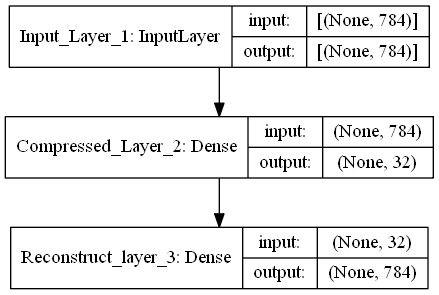

In [13]:
plot_model(Van_autoencoder, to_file='VANILLA_ae.png', show_shapes=True)

In [14]:
Van_autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer_1 (InputLayer)   [(None, 784)]             0         
_________________________________________________________________
Compressed_Layer_2 (Dense)   (None, 32)                25120     
_________________________________________________________________
Reconstruct_layer_3 (Dense)  (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [15]:
epochs = 30
batch_size = 128

history = Van_autoencoder.fit(train_X, train_X, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(valid_X, valid_X))

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 4s 76us/sample - loss: 0.0589 - val_loss: 0.0345
Epoch 2/30
48000/48000 [==============================] - 1s 29us/sample - loss: 0.0285 - val_loss: 0.0240
Epoch 3/30
48000/48000 [==============================] - 1s 28us/sample - loss: 0.0211 - val_loss: 0.0188
Epoch 4/30
48000/48000 [==============================] - 1s 29us/sample - loss: 0.0171 - val_loss: 0.0157
Epoch 5/30
48000/48000 [==============================] - 1s 29us/sample - loss: 0.0146 - val_loss: 0.0137
Epoch 6/30
48000/48000 [==============================] - 1s 29us/sample - loss: 0.0129 - val_loss: 0.0124
Epoch 7/30
48000/48000 [==============================] - 1s 28us/sample - loss: 0.0119 - val_loss: 0.0116
Epoch 8/30
48000/48000 [==============================] - 1s 28us/sample - loss: 0.0113 - val_loss: 0.0112
Epoch 9/30
48000/48000 [==============================] - 1s 28us/sample - loss: 0.0110 - val_

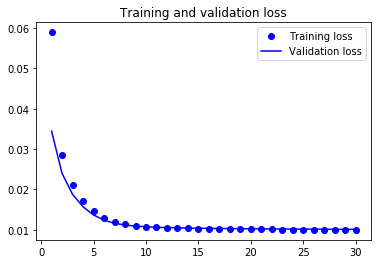

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [17]:
Van_encoder_latent = Model(inputs = input_img, outputs = encoded)

Van_encoded_imgs = Van_encoder_latent.predict(x_test)#compressed

Van_decoded_imgs = Van_autoencoder.predict(x_test)#reconstructed

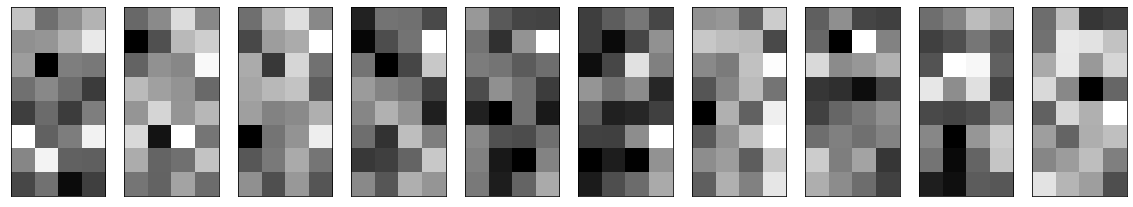

In [18]:
num_images = 10

random_test_image_ind = np.random.randint(x_test.shape[0], size=num_images)

plt.figure(figsize=(20, 8))
for i,image_index in enumerate(random_test_image_ind):
    ax = plt.subplot(1, num_images, i+1)
    plt.imshow(Van_encoded_imgs[image_index].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [19]:
Van_encoded_imgs.shape

(10000, 32)

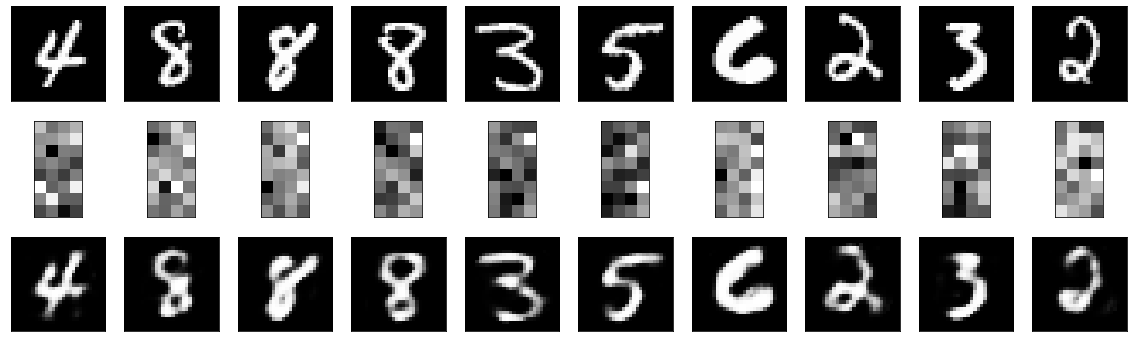

In [20]:
plt.figure(figsize=(20, 6))

for i,image_index in enumerate(random_test_image_ind):
    # display original
    ax = plt.subplot(3, num_images, i+1)
    plt.imshow(x_test[image_index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # compressed representation
    ax = plt.subplot(3, num_images, i+num_images+1)
    plt.imshow(Van_encoded_imgs[image_index].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, num_images, i+2*num_images+1)
    plt.imshow(Van_decoded_imgs[image_index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [21]:
#  free memory resources, it will interrupt the kernel
#os.kill(os.getpid(), signal.SIGTERM)